In [127]:
import pandas as pd
from IPython.display import display

# Carica il file Excel
df = pd.read_excel('/Users/andreacip/Downloads/dpc-covid19-ita-andamento-nazionale.xlsx')

# Assicurati che la colonna della data sia nel formato datetime e rimuovi l'orario
df['data'] = pd.to_datetime(df['data']).dt.normalize()

# Imposta la colonna della data come indice del DataFrame
df.set_index('data', inplace=True)

# Escludi la colonna con intestazione "test"
if 'test' in df.columns:
    df.drop(columns=['test'], inplace=True)

# Raggruppa i dati per semestre e calcola la somma
df_semestrale = df.resample('6M').sum()

# Converti l'indice in formato 'YYYY-MM-dd' senza cambiare il tipo di indice
df_semestrale.index = df_semestrale.index.strftime('%d-%m-%Y')

# Formatta i numeri grandi senza utilizzare il punto come separatore delle migliaia
pd.options.display.float_format = '{:,.0f}'.format

# Visualizza le prime righe del DataFrame semestrale con stile
print("DataFrame semestrale:")
display(df_semestrale.head().style.background_gradient(cmap='coolwarm').format("{:,.0f}"))

# Calcola la media dei 'nuovi_positivi' per semestre e rimuovi l'orario se presente
media_nuovi_positivi_semestrale = df['nuovi_positivi'].resample('6M').mean().astype(int)
media_nuovi_positivi_semestrale.index = media_nuovi_positivi_semestrale.index.strftime('%d-%m-%Y')

# Applica la formattazione con la virgola e visualizza con stile
styled_media = media_nuovi_positivi_semestrale.to_frame(name='Media Nuovi Positivi').style.background_gradient(cmap='coolwarm').format("{:,}")
print("\nMedia semestrale dei nuovi positivi:")
display(styled_media)

# Calcola altre statistiche per ogni semestre
statistiche_semestrali = df['nuovi_positivi'].resample('6M').agg(['mean', 'median', 'min', 'max', 'std']).astype(int)
statistiche_semestrali.index = statistiche_semestrali.index.strftime('%d-%m-%Y')

# Applica la formattazione con la virgola e visualizza con stile
styled_statistiche = statistiche_semestrali.style.background_gradient(cmap='coolwarm').format("{:,}")
print("\nStatistiche semestrali dei nuovi positivi:")
display(styled_statistiche)



# Calcola il valore massimo dei 'nuovi_positivi' per semestre
massimo_semestrale = df['nuovi_positivi'].resample('6M').max().astype(int)
massimo_semestrale.index = massimo_semestrale.index.strftime('%d-%m-%Y')

# Calcola il valore minimo dei 'nuovi_positivi' per semestre
minimo_semestrale = df['nuovi_positivi'].resample('6M').min().astype(int)
minimo_semestrale.index = minimo_semestrale.index.strftime('%d-%m-%Y')

# Visualizza le nuove statistiche semestrali con stile
print("\nAltre statistiche semestrali dei nuovi positivi:")
display(pd.DataFrame({
    'Massimo': massimo_semestrale,
    'Minimo': minimo_semestrale
}).style.background_gradient(cmap='coolwarm').format("{:,}"))


DataFrame semestrale:


,ricoverati_con_sintomi,isolamento_domiciliare,totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,
29-02-2020,"1,337","1,716","3,375","1,120",146,96,"3,617","68,904"
31-08-2020,"1,672,455","6,054,210","7,914,661","268,183","22,790,833","4,943,236","35,648,730","699,294,349"
28-02-2021,"3,266,801","70,249,737","73,873,427","2,659,438","180,328,835","10,792,882","264,995,162","3,968,245,667"
31-08-2021,"2,152,931","48,342,502","50,780,649","1,605,859","669,606,087","22,275,265","742,662,024","11,860,237,514"
28-02-2022,"1,527,150","135,038,227","136,717,365","8,104,318","1,044,162,511","24,788,972","1,205,669,081","22,922,585,585"



Media semestrale dei nuovi positivi:


,Media Nuovi Positivi
data,
29-02-2020,186
31-08-2020,"1,457"
28-02-2021,"14,693"
31-08-2021,"8,727"
28-02-2022,"44,775"
31-08-2022,"48,527"
28-02-2023,"20,582"
31-08-2023,"1,970"
29-02-2024,"4,185"



Statistiche semestrali dei nuovi positivi:


,mean,median,min,max,std
data,,,,,
29-02-2020,186,229,78,250,79
31-08-2020,"1,457",635,114,"6,557","1,652"
28-02-2021,"14,693","13,720",978,"40,902","10,002"
31-08-2021,"8,727","6,342",389,"26,824","7,412"
28-02-2022,"44,775","12,877","1,516","220,532","59,689"
31-08-2022,"48,527","41,874","7,537","142,967","27,986"
28-02-2023,"20,582","18,797","1,497","65,925","14,426"
31-08-2023,"1,970","1,458",195,"6,706","1,445"
29-02-2024,"4,185","3,976",80,"16,615","3,452"



Altre statistiche semestrali dei nuovi positivi:


,Massimo,Minimo
data,,
29-02-2020,250,78
31-08-2020,"6,557",114
28-02-2021,"40,902",978
31-08-2021,"26,824",389
28-02-2022,"220,532","1,516"
31-08-2022,"142,967","7,537"
28-02-2023,"65,925","1,497"
31-08-2023,"6,706",195
29-02-2024,"16,615",80


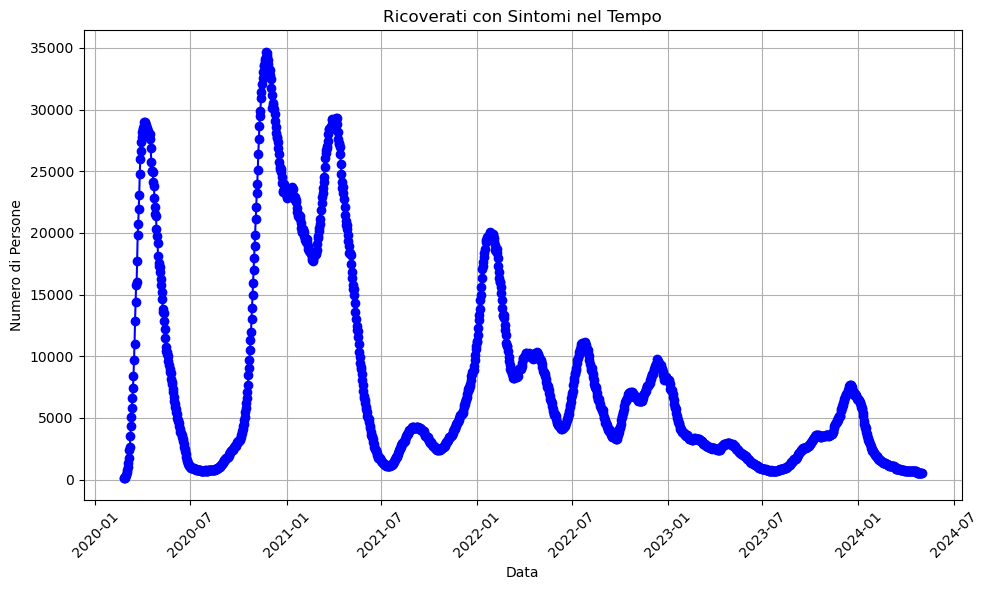

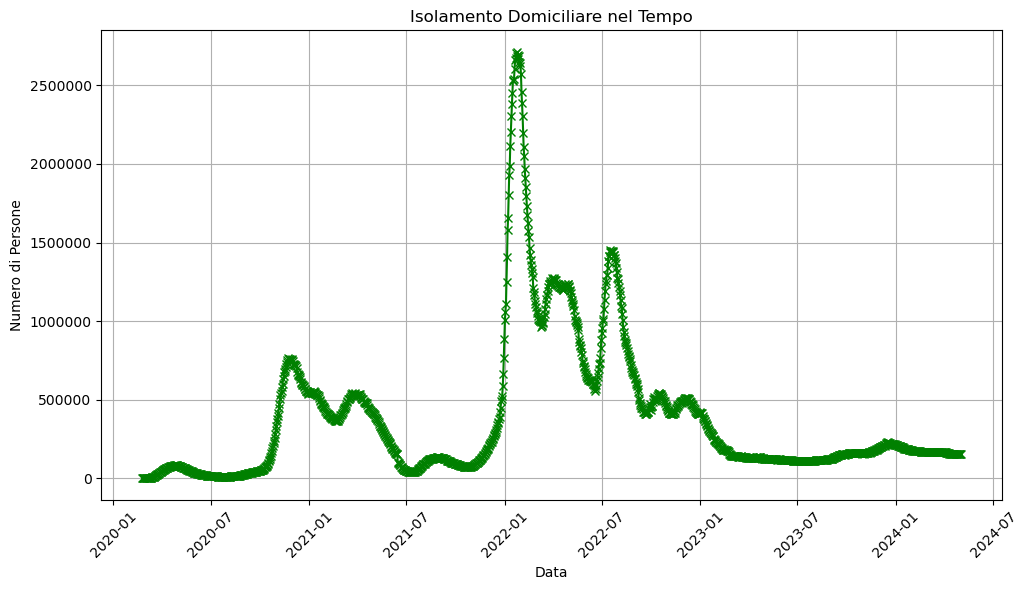

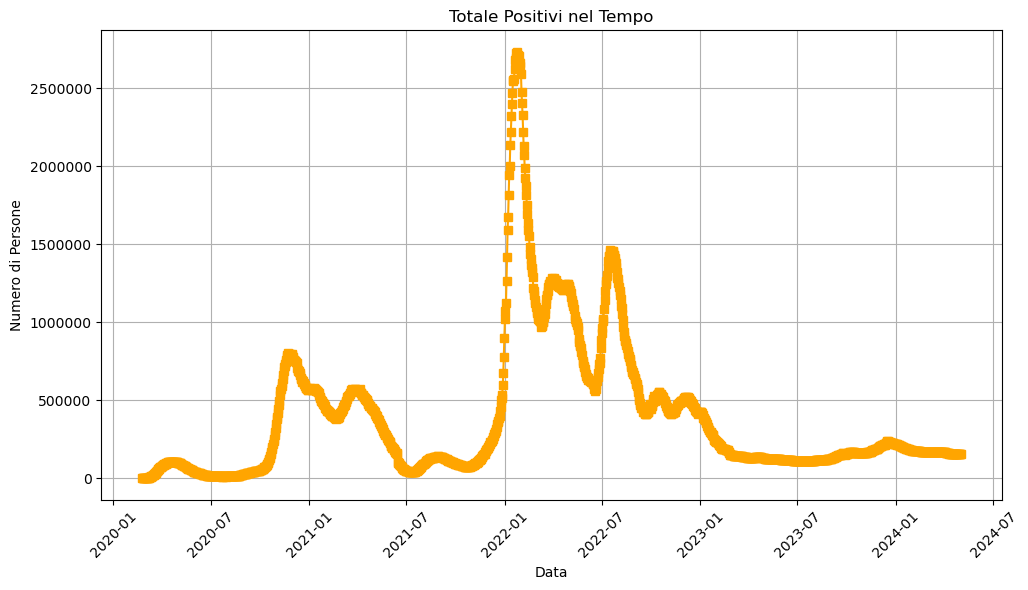

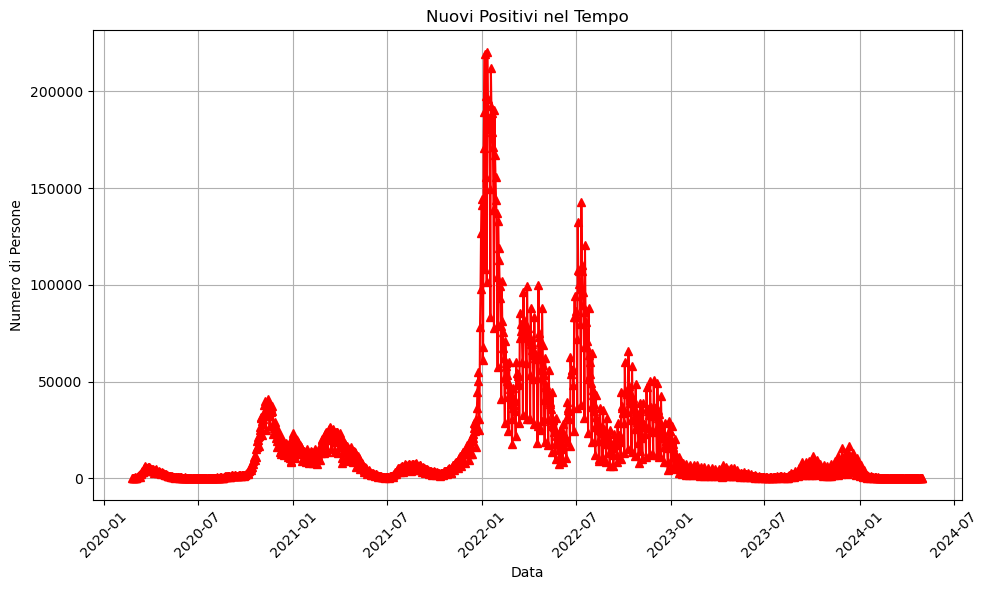

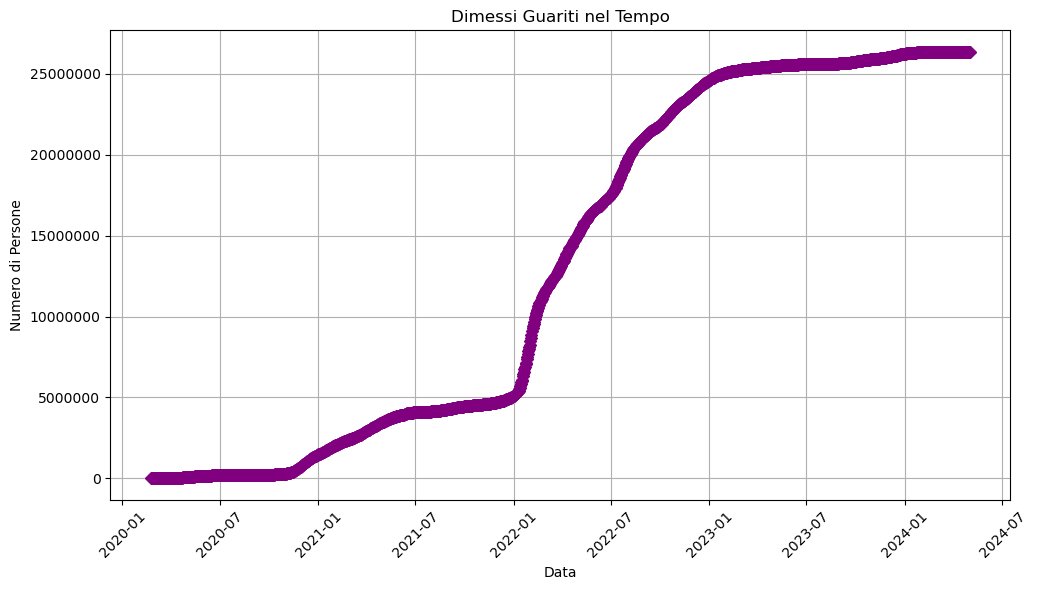

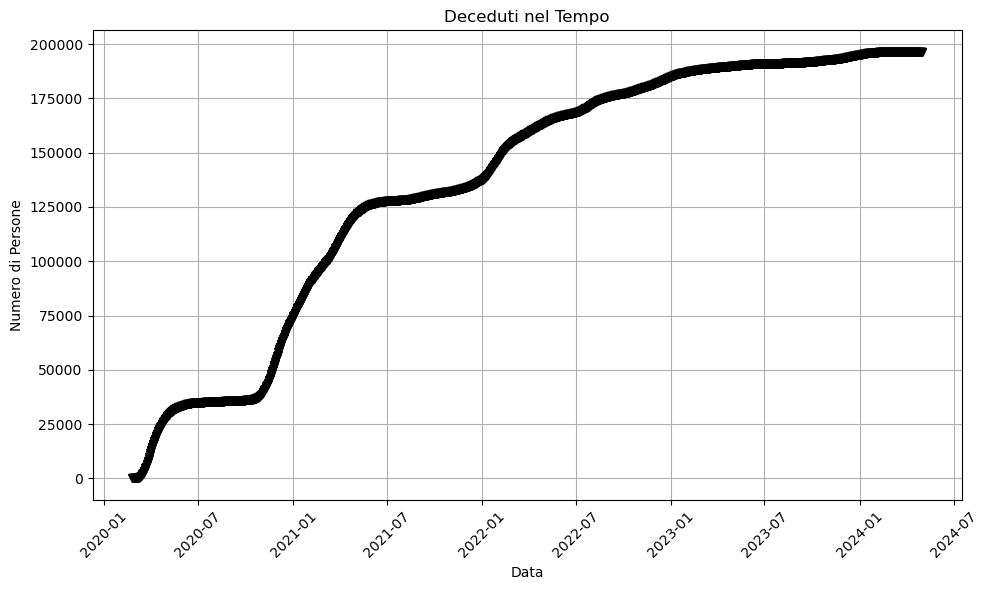

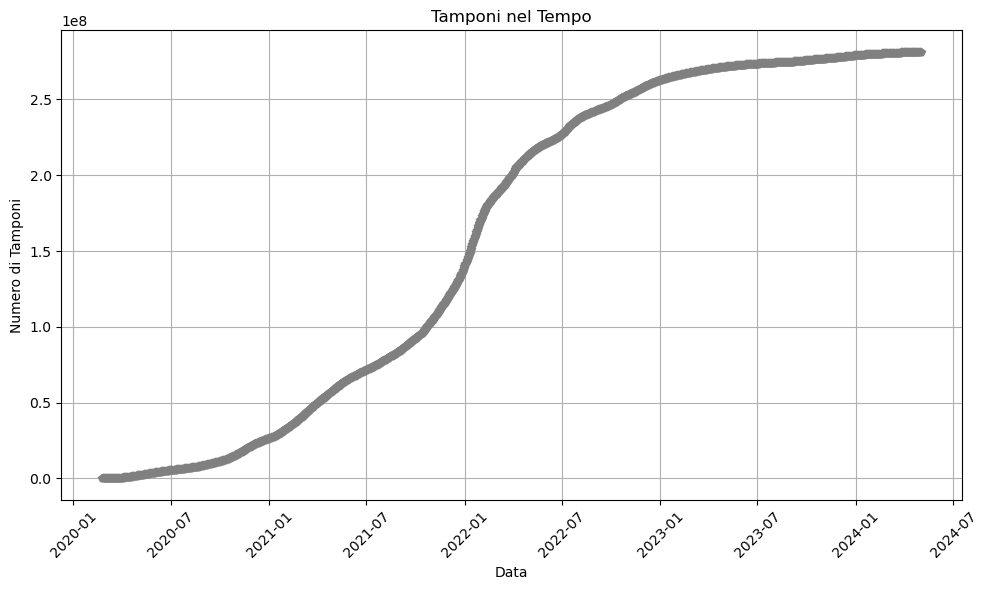

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/andreacip/Downloads/dpc-covid19-ita-andamento-nazionale.xlsx'  # Sostituisci con il percorso del tuo file
df = pd.read_excel(file_path)

# Grafico 1: Ricoverati con sintomi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['ricoverati_con_sintomi'], marker='o', color='blue')
plt.title('Ricoverati con Sintomi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 2: Isolamento domiciliare nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['isolamento_domiciliare'], marker='x', color='green')
plt.title('Isolamento Domiciliare nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 3: Totale positivi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['totale_positivi'], marker='s', color='orange')
plt.title('Totale Positivi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 4: Nuovi positivi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['nuovi_positivi'], marker='^', color='red')
plt.title('Nuovi Positivi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 5: Dimessi guariti nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['dimessi_guariti'], marker='D', color='purple')
plt.title('Dimessi Guariti nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 6: Deceduti nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['deceduti'], marker='v', color='black')
plt.title('Deceduti nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')

# Grafico 7: Tamponi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['tamponi'], marker='p', color='gray')
plt.title('Tamponi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Tamponi')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


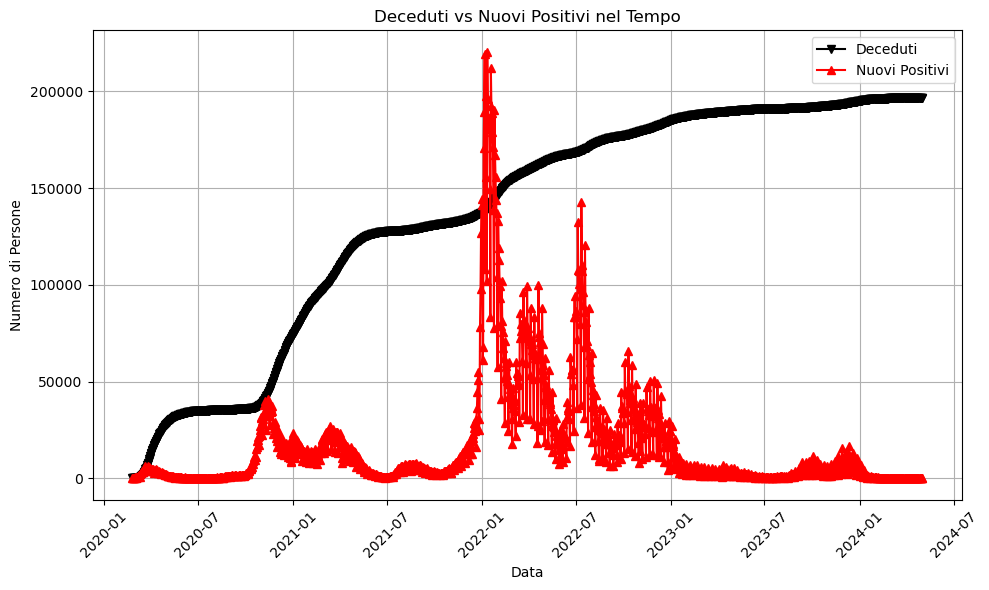

In [89]:

# Grafico: Deceduti e Nuovi Positivi nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['deceduti'], marker='v', color='black', label='Deceduti')
plt.plot(pd.to_datetime(df['data']), df['nuovi_positivi'], marker='^', color='red', label='Nuovi Positivi')
plt.title('Deceduti vs Nuovi Positivi nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()


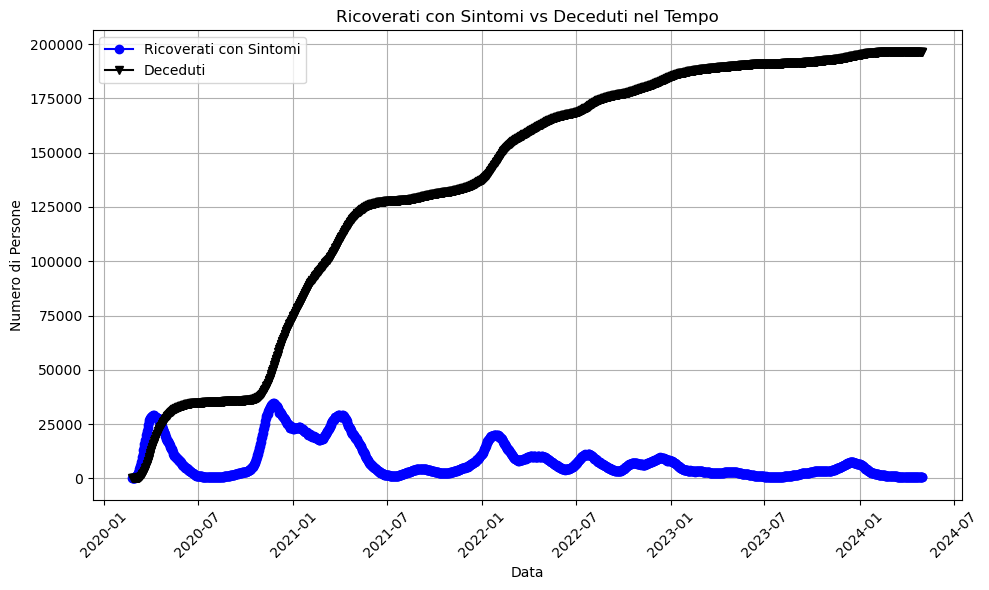

In [93]:
# Grafico: Ricoverati con Sintomi e Deceduti nel tempo
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['data']), df['ricoverati_con_sintomi'], marker='o', color='blue', label='Ricoverati con Sintomi')
plt.plot(pd.to_datetime(df['data']), df['deceduti'], marker='v', color='black', label='Deceduti')
plt.title('Ricoverati con Sintomi vs Deceduti nel Tempo')
plt.xlabel('Data')
plt.ylabel('Numero di Persone')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ticklabel_format(axis='y', style='plain')
plt.legend()
plt.show()


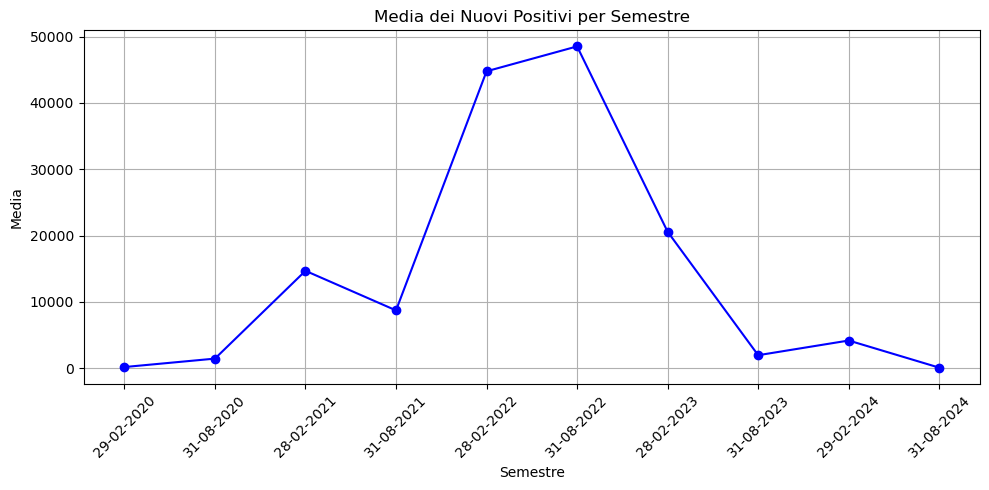

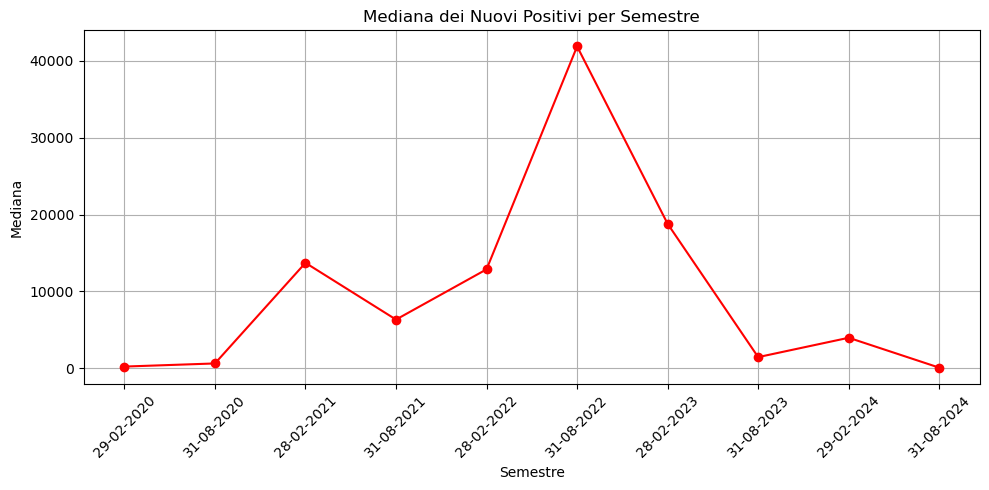

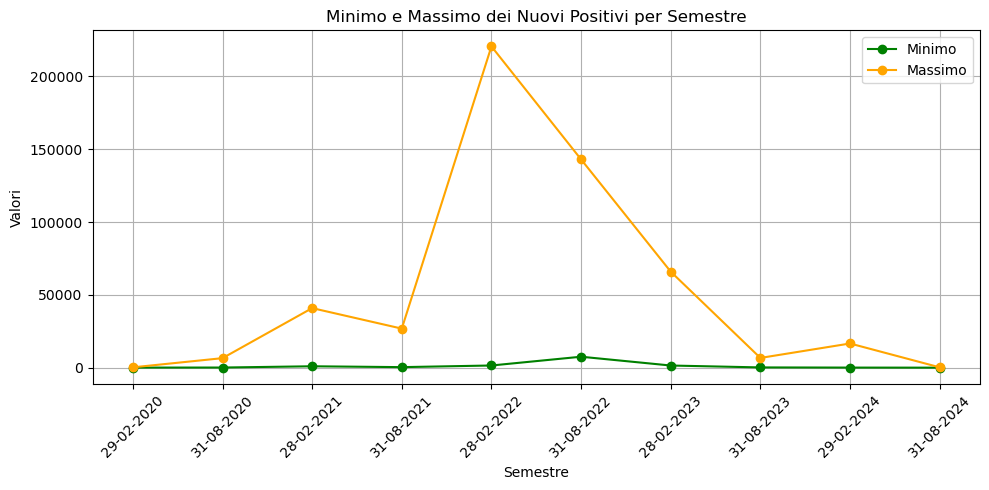

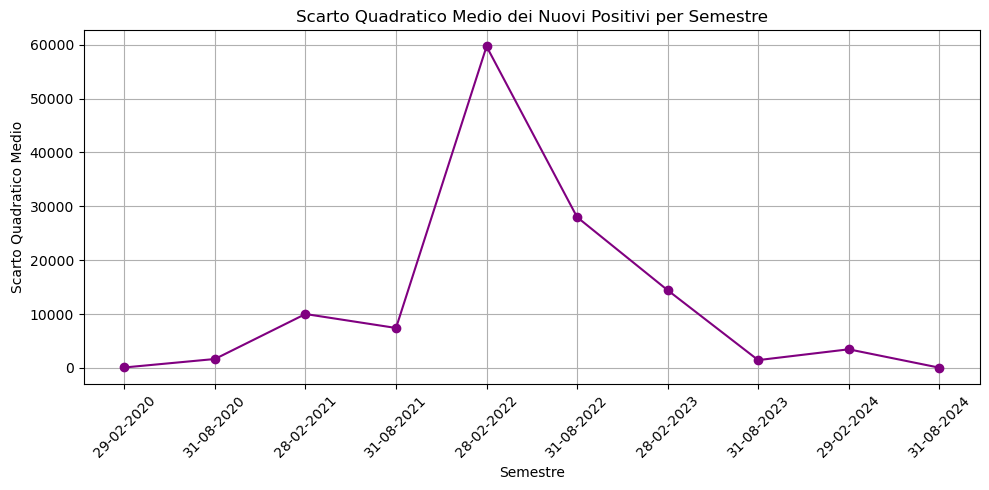

In [144]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che 'statistiche_semestrali' sia il tuo DataFrame già caricato con i dati

# Grafico della media dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['mean'], marker='o', color='blue')
plt.title('Media dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Media')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico della mediana dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['median'], marker='o', color='red')
plt.title('Mediana dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Mediana')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grafico del minimo e del massimo dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['min'], marker='o', color='green', label='Minimo')
plt.plot(statistiche_semestrali.index, statistiche_semestrali['max'], marker='o', color='orange', label='Massimo')
plt.title('Minimo e Massimo dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Valori')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Grafico dello scarto quadratico medio dei nuovi positivi per semestre
plt.figure(figsize=(10, 5))
plt.plot(statistiche_semestrali.index, statistiche_semestrali['std'], marker='o', color='purple')
plt.title('Scarto Quadratico Medio dei Nuovi Positivi per Semestre')
plt.xlabel('Semestre')
plt.ylabel('Scarto Quadratico Medio')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [146]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# ... (il tuo codice precedente per caricare e preparare i dati) ...

# Funzione per salvare un DataFrame come immagine PNG
def salva_tabella(df, filename):
    fig, ax = plt.subplots(figsize=(12, 2)) # Regola le dimensioni come necessario
    ax.axis('off')
    tbl = table(ax, df, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(14)
    tbl.scale(1.2, 1.2)
    plt.savefig(filename, bbox_inches='tight')
    plt.close(fig)

# Utilizza la funzione per salvare le tue tabelle
salva_tabella(df_semestrale.head(), 'df_semestrale.png')
salva_tabella(media_nuovi_positivi_semestrale.to_frame(name='Media Nuovi Positivi'), 'media_nuovi_positivi_semestrale.png')
salva_tabella(statistiche_semestrali, 'statistiche_semestrali.png')
salva_tabella(pd.DataFrame({'Massimo': massimo_semestrale, 'Minimo': minimo_semestrale}), 'altre_statistiche_semestrali.png')

print("Le tabelle sono state salvate come immagini PNG.")


Le tabelle sono state salvate come immagini PNG.


In [158]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import seaborn as sns
import os

# Imposta lo stile grafico di seaborn
sns.set_theme(style='whitegrid')

# ... (il tuo codice precedente per caricare e preparare i dati) ...

# Funzione per salvare un DataFrame come immagine PNG con stile migliorato
def salva_tabella_stile(df, filename, directory):
    fig, ax = plt.subplots(figsize=(12, len(df)*0.5)) # Regola le dimensioni in base al numero di righe
    ax.axis('off')
    tbl = table(ax, df, loc='center', cellLoc='center', colWidths=[0.2]*len(df.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(14)
    tbl.scale(1.5, 1.5) # Aumenta la scala per adattare il testo
    for key, cell in tbl.get_celld().items():
        cell.set_edgecolor('black') # Aggiunge bordi alle celle
    plt.savefig(os.path.join(directory, filename), bbox_inches='tight', dpi=300)
    plt.close(fig)
    print(f"La tabella è stata salvata come immagine PNG in: {os.path.join(directory, filename)}")

# Specifica la directory in cui vuoi salvare i file
directory = '/Users/andreacip/development/Pythonlum/Screenshot'

# Utilizza la funzione per salvare le tue tabelle con stile migliorato
salva_tabella_stile(df_semestrale.head(), 'df_semestrale.png', directory)
salva_tabella_stile(media_nuovi_positivi_semestrale.to_frame(name='Media Nuovi Positivi'), 'media_nuovi_positivi_semestrale.png', directory)
salva_tabella_stile(statistiche_semestrali, 'statistiche_semestrali.png', directory)
salva_tabella_stile(pd.DataFrame({'Massimo': massimo_semestrale, 'Minimo': minimo_semestrale}), 'altre_statistiche_semestrali.png', directory)


La tabella è stata salvata come immagine PNG in: /Users/andreacip/development/Pythonlum/Screenshot/df_semestrale.png
La tabella è stata salvata come immagine PNG in: /Users/andreacip/development/Pythonlum/Screenshot/media_nuovi_positivi_semestrale.png
La tabella è stata salvata come immagine PNG in: /Users/andreacip/development/Pythonlum/Screenshot/statistiche_semestrali.png
La tabella è stata salvata come immagine PNG in: /Users/andreacip/development/Pythonlum/Screenshot/altre_statistiche_semestrali.png
